# Setting
---

In [21]:
import torch

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [151]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install
!mkdir checkpoints
!pip install wget
!wget -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html


fatal: destination path 'mmdetection' already exists and is not an empty directory.
The system cannot find the path specified.
A subdirectory or file checkpoints already exists.


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [152]:
!pip install mmdet

In [153]:
!pip install wandb
!wandb login

wandb: Currently logged in as: jslee1584. Use `wandb login --relogin` to force relogin


In [154]:
!wandb login --relogin

wandb: ERROR Find detailed error logs at: d:\01_Py_Workspace\2022_AI\wandb\debug-cli.log
Error: api_key not configured (no-tty). call wandb login [your_api_key]


In [155]:
import wandb

wandb.init(project="2022_AI_Contest_Car_Parking", entity="jslee1584")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jslee1584. Use `wandb login --relogin` to force relogin


In [3]:
EPOCH = 1
USE_WANDB=True # True, False

WANDB_NAME ="faster_rcnn_epoch"+str(EPOCH) # WandB run name

#MMDET_CONFIG = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py'
#MMDET_CHECKPOINT = './checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'
#MMDET_CONFIG = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
MMDET_CONFIG = './mmdetection/configs/yolox/yolox_x_8x8_300e_coco.py'
#MMDET_CHECKPOINT = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
#MMDET_CHECKPOINT = './work_dir/faster_rcnn_epoch1_2022620_161553.ptn'
MMDET_CHECKPOINT = './checkpoints/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'



In [157]:
#wget.download(CHECKPOINT_URL, './checkpoints')

In [158]:
if USE_WANDB:
    import wandb

    wandb.init(project="2022_AI_Contest_Car_Parking", entity="jslee1584", name=WANDB_NAME)
    wandb.config = {
    "learning_rate": 0.001,
    "epochs": 100,
    "batch_size": 128
    }
   

# Demo 테스트

In [22]:
# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 
from mmdet.apis import init_detector, inference_detector
import mmcv

model = init_detector(MMDET_CONFIG, MMDET_CHECKPOINT, device='cuda:0')

load checkpoint from local path: ./checkpoints/crpn_faster_rcnn_r50_caffe_fpn_1x_coco-c8283cca.pth


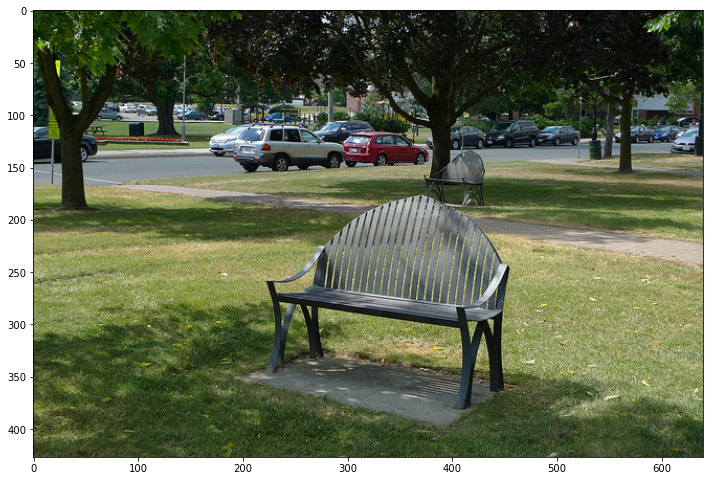

In [23]:
import cv2
import matplotlib.pyplot as plt
img = 'mmdetection/demo/demo.jpg'

img_arr  = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
result = inference_detector(model, img)

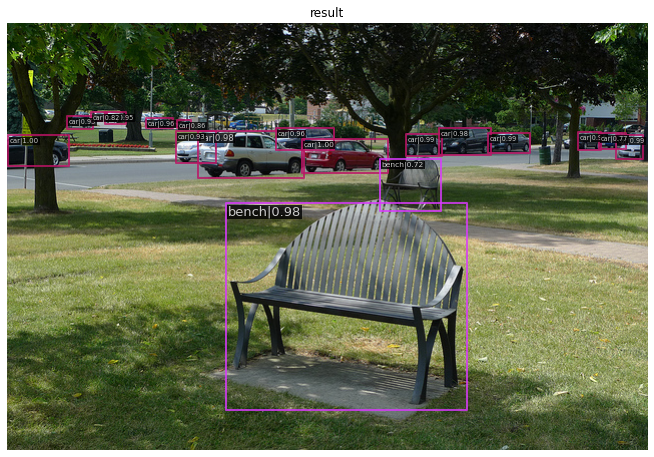

In [24]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img, result, score_thr=0.7)

In [162]:
# import numpy as np

# score_threshold = 0.7
# result_filtered = result[np.where(result[:, 4] > score_threshold)]

## Custom Dataset config file 수정

In [25]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.11.0 True
2.25.0
11.1
MSVC 192930137


In [164]:
import os
os.listdir("./Split_CustomData")

['train_img', 'train_label.json', 'val_img', 'val_label.json']

In [165]:
import os
os.makedirs('./work_dir')

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './work_dir'

## Colab 예제 실습

https://colab.research.google.com/github/ZwwWayne/mmdetection/blob/update-colab/demo/MMDet_Tutorial.ipynb#scrollTo=GdSaB2ad0EdX

In [ ]:
# import copy
# import os.path as osp

# import mmcv
# import numpy as np

# from mmdet.datasets.builder import DATASETS
# from mmdet.datasets.custom import CustomDataset

# @DATASETS.register_module(force=True)
# class CarParkingDataset(CustomDataset):

#     CLASSES = ('car', 'suv', 'van', 'bus', 'school bus', 'truck', 'taxi', 'adult', 'child', 'motorcycle', 'kick board', 'bicycle', 'stroller', 'shopping cart', )
#     # PALETTE = [(220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230),
#     #            (106, 0, 228), (0, 60, 100), (0, 80, 100), (0, 0, 70),
#     #            (0, 0, 192), (250, 170, 30), (100, 170, 30), (220, 220, 0),
#     #            (175, 116, 175), (250, 0, 30), ]

In [26]:
MMDET_CONFIG = './mmdetection/configs/cascade_rpn\crpn_faster_rcnn_r50_caffe_fpn_1x_coco.py'
MMDET_CHECKPOINT = './checkpoints/crpn_faster_rcnn_r50_caffe_fpn_1x_coco-c8283cca.pth'

In [28]:
from mmdet.apis import set_random_seed
from mmcv import Config

cfg = Config.fromfile(MMDET_CONFIG)

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='Resize', img_scale=(640, 480), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(640, 480),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

#classes = ('car', 'suv', 'van', 'bus', 'school bus', 'truck', 'taxi', 'adult', 'child', 'motorcycle', 'kick board', 'bicycle', 'stroller', 'shopping cart')
classes = ('세단(승용차)', 'SUV', '승합차', '버스', '학원차량(통학버스)', '트럭', '택시', '성인', '어린이', '오토바이', '전동킥보드', '자전거', '유모차', '쇼핑카트')
# Modify dataset type and path
cfg.dataset_type = 'CocoDataset'
cfg.classes = classes
cfg.data_root = './Split_CustomData'
cfg.data.samples_per_gpu = 1
cfg.data.workers_per_gpu= 1

cfg.data.test.type = 'CocoDataset'
cfg.data.test.data_root = './CustomData/test'
cfg.data.test.ann_file = 'Test_Images_Information.json'
cfg.data.test.img_prefix = 'images'
cfg.data.test.classes = classes
cfg.data.test.pipeline = cfg.test_pipeline

cfg.data.train.type = 'CocoDataset'
cfg.data.train.data_root = './Split_CustomData'
cfg.data.train.ann_file = 'train_label.json'
cfg.data.train.img_prefix = 'train_img'
cfg.data.train.classes = classes
cfg.data.train.pipeline = cfg.train_pipeline

cfg.data.val.type = 'CocoDataset'
cfg.data.val.data_root = './Split_CustomData'
cfg.data.val.ann_file = 'val_label.json'
cfg.data.val.img_prefix = 'val_img'
cfg.data.val.classes = classes
cfg.data.val.pipeline = cfg.train_pipeline
# modify num classes of the model in box head

cfg.model.roi_head.bbox_head.num_classes = 14 # faster rcnn
#cfg.model.bbox_head.num_classes = 14 # YOLO X

#  Some configuration files num_classes Maybe not in this place , After generation, search the configuration file , See if they've been revised 
# for head in cfg.model.roi_head.bbox_head:
#     head.num_classes = 14
# if "mask_head" in cfg.model.roi_head:
#     cfg.model.roi_head.mask_head.num_classes = 14
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = MMDET_CHECKPOINT

# Set up working dir to save files and logs.
cfg.work_dir = './work_dir'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10
cfg.runner.max_epochs = EPOCH
cfg.evaluation.interval = 49
cfg.checkpoint_config.interval = 200

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
#We can also use tensorboard to log the training process
# cfg.log_config.hooks = [
#     dict(type='TextLoggerHook'),
#     dict(type='TensorboardLoggerHook')]

# if USE_WANDB :
#     cfg.log_config = dict(
#         interval = 10,
#         hooks=[
#             dict(type='TextLoggerHook', interval = 50),
#             dict(type='WandbLoggerHook', interval = 50,
#             init_kwargs=dict(
#                 project="2022_AI_Contest_Car_Parking", entity="jslee1584", name=WANDB_NAME
#                 ),
#             )
#         ]
#     )

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='CascadeRPNHead',
        num_stages=2,
        stages=[
            dict(
                type='StageCascadeRPNHead',
                in_channels=256,
                feat_channels=256,
                anchor_generator=dict(
                    type='AnchorGenerator',
                    scales=[8],
                    ratios=[1.0],
                    strides=[4, 8, 16, 32, 64]),
                adapt_cfg=dict(type='dilation', 

In [18]:
from mmdet.datasets import build_dataset

display(cfg.model.roi_head.bbox_head)
build_dataset(cfg.data.train)

{'type': 'Shared2FCBBoxHead',
 'in_channels': 256,
 'fc_out_channels': 1024,
 'roi_feat_size': 7,
 'num_classes': 14,
 'bbox_coder': {'type': 'DeltaXYWHBBoxCoder',
  'target_means': [0.0, 0.0, 0.0, 0.0],
  'target_stds': [0.04, 0.04, 0.08, 0.08]},
 'reg_class_agnostic': False,
 'loss_cls': {'type': 'CrossEntropyLoss',
  'use_sigmoid': False,
  'loss_weight': 1.5},
 'loss_bbox': {'type': 'SmoothL1Loss', 'loss_weight': 1.0, 'beta': 1.0}}

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!



CocoDataset Train dataset with number of images 19715, and instance counts: 
+------------------+-------+-------------+-------+-------------+-------+---------------+-------+------------------------+-------+
| category         | count | category    | count | category    | count | category      | count | category               | count |
+------------------+-------+-------------+-------+-------------+-------+---------------+-------+------------------------+-------+
| 0 [세단(승용차)] | 46881 | 1 [SUV]     | 22679 | 2 [승합차]  | 3681  | 3 [버스]      | 688   | 4 [학원차량(통학버스)] | 901   |
| 5 [트럭]         | 2825  | 6 [택시]    | 1246  | 7 [성인]    | 16685 | 8 [어린이]    | 414   | 9 [오토바이]           | 2186  |
| 10 [전동킥보드]  | 305   | 11 [자전거] | 2315  | 12 [유모차] | 58    | 13 [쇼핑카트] | 7163  | -1 background          | 0     |
+------------------+-------+-------------+-------+-------------+-------+---------------+-------+------------------------+-------+

In [29]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [30]:
# Train
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-06-21 02:05:08,714 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-06-21 02:05:08,905 - mmdet - INFO - load checkpoint from local path: ./checkpoints/crpn_faster_rcnn_r50_caffe_fpn_1x_coco-c8283cca.pth


loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


2022-06-21 02:05:09,088 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([15, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([15]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([56, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([56]).
2022-06-21 02:05:09,100 - mmdet - INFO - Start running, host: leeji@DESKTOP-J62PJ64, work_dir: d:\01_Py_Workspace\2022_AI\work_dir
2022-06-21 02:05:09,102 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY

In [ ]:
# # load tensorboard in colab
# %load_ext tensorboard

# # see curves in tensorboard
# %tensorboard --logdir ./work_dir

In [31]:
import datetime as dt
import shutil

now = dt.datetime.now()
chkpoint_file = WANDB_NAME+'_'+str(now.year)+str(now.month)+str(now.day) + '_' + str(now.hour)+str(now.minute)+str(now.second) + '.ptn'
shutil.move("./work_dir/latest.pth", osp.join("./work_dir", chkpoint_file))

'./work_dir\\faster_rcnn_epoch1_2022621_10958.ptn'

c:\Users\leeji\anaconda3\lib\site-packages\mmdet\core\visualization\image.py:351: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  stream, _ = canvas.print_to_buffer()
c:\Users\leeji\anaconda3\lib\site-packages\mmdet\core\visualization\image.py:351: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  stream, _ = canvas.print_to_buffer()
c:\Users\leeji\anaconda3\lib\site-packages\mmdet\core\visualization\image.py:351: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  stream, _ = canvas.print_to_buffer()
c:\Users\leeji\anaconda3\lib\site-packages\mmdet\core\visualization\image.py:351: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  stream, _ = canvas.print_to_buffer()
c:\Users\leeji\anaconda3\lib\site-packages\mmdet\core\visualization\image.py:351: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  stream, _ = canvas.print_to_buffer()
c:\U

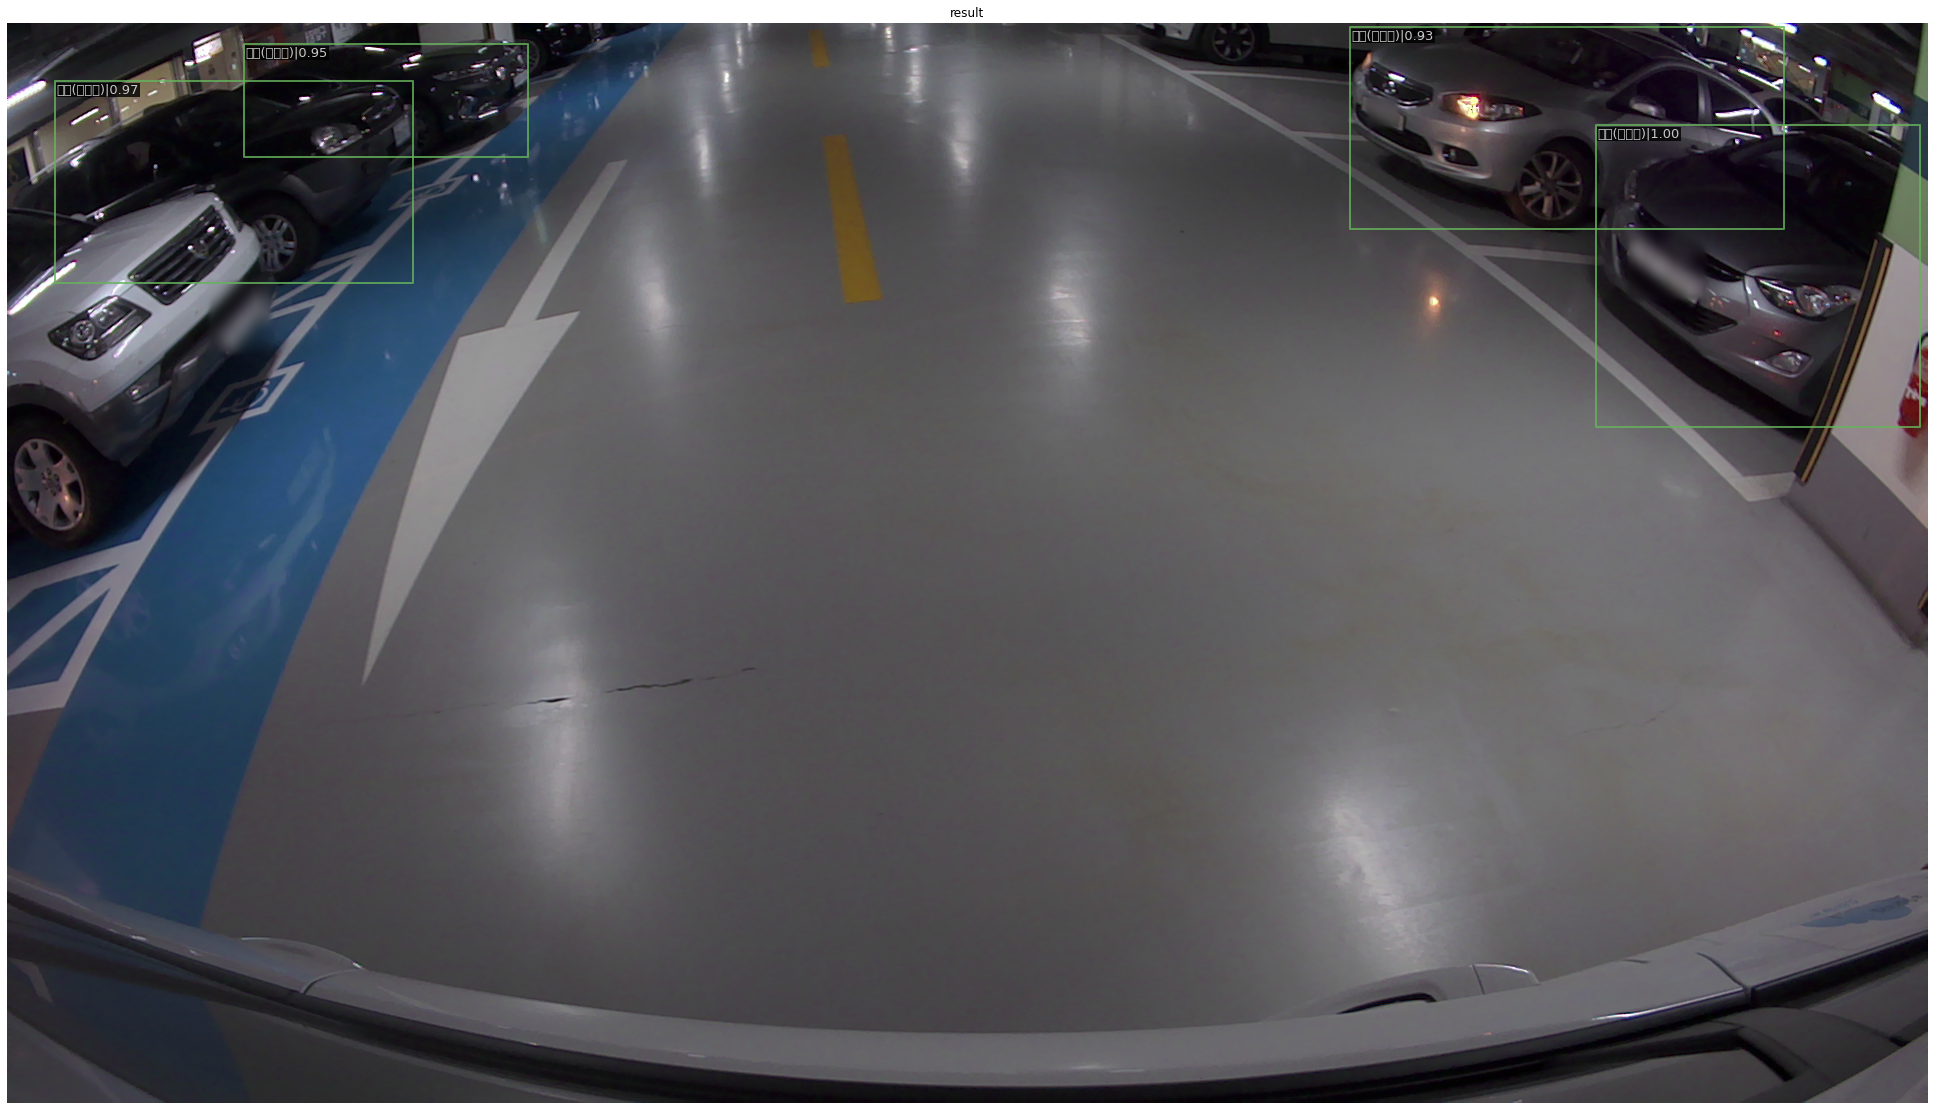

In [32]:
from mmdet.apis import init_detector, inference_detector
from mmdet.apis import show_result_pyplot
import mmcv

img = mmcv.imread('./CustomData/test/images/62d398b4-78aa-4dd2-82db-2f69891b478e.png')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, 0.75)


## prediction 및 submission 작성 (bbox predict)

In [209]:
MMDET_CONFIG = './mmdetection/configs/custom_config.py'
MMDET_CHECKPOINT = './work_dir/faster_rcnn_epoch1_2022620_205249.ptn'

model = init_detector(MMDET_CONFIG, MMDET_CHECKPOINT, device='cuda:0')

load checkpoint from local path: ./work_dir/faster_rcnn_epoch1_2022620_205249.ptn


In [35]:
import json
from tqdm import tqdm
import numpy as np

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            # 👇️ alternatively use str()
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

def submission(model, data):
    img_path = osp.join(test_dir, 'images', data['file_name'])
    img = mmcv.imread(img_path)
    results = inference_detector(model, img)
    
    for result in results:
        for idx, r in enumerate(result):
            if r[4] >= 0.75 :
                sub_dir = {}
                sub_dir['image_id'] = data['id']
                sub_dir['category_id'] = idx+1
                sub_dir['bbox'] = [r[0],r[1], r[2]-r[0], r[3]-r[1]]
                sub_dir['score'] = r[4]
                sub_dir['segmentation'] = []
                submission_list.append(sub_dir)

                


In [37]:

test_dir = './CustomData/test'

submission_list = []

#test_json_path = './CustomData/test/Test_Images_Information.json'
with open(osp.join(test_dir, 'Test_Images_Information.json'), encoding='utf-8') as json_reader:
    dataset = json.load(json_reader)

#count = 0

for img_data in tqdm(dataset['images']):
    submission(model, img_data)
    #count += 1
    #if count == 12:
     #   break
    
with open('./submission.json', 'w', encoding='utf-8') as f : 
    json.dump(submission_list, f, ensure_ascii=False, cls=NpEncoder)   
 

 23%|██▎       | 4507/19521 [17:47<1:18:52,  3.17it/s]

## 작성 submission test

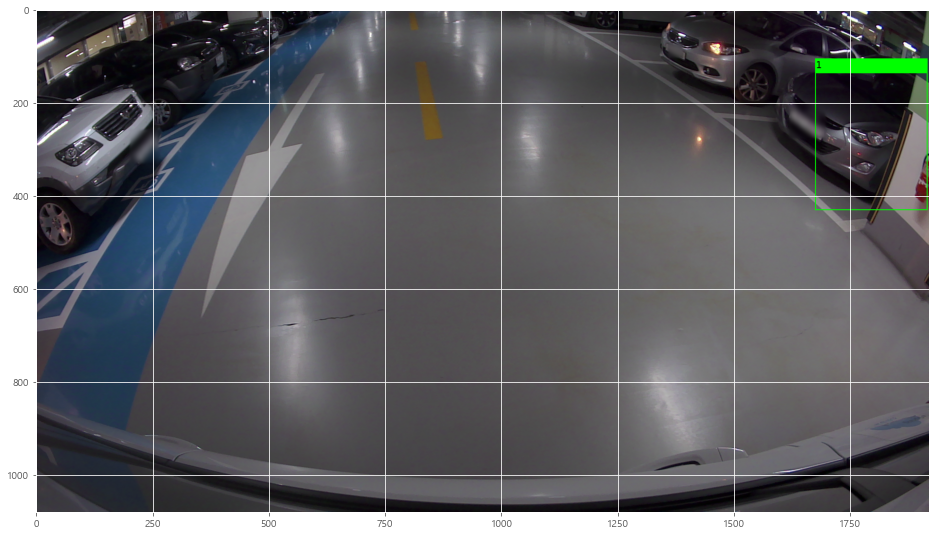

In [261]:
from chitra.image import Chitra
import matplotlib.pyplot as plt
import cv2

with open('./submission_faster_rcnn.json', encoding='utf-8') as json_reader:
    dataset = json.load(json_reader)

num = 5
url = './CustomData/test/images/62d398b4-78aa-4dd2-82db-2f69891b478e.png'
image = Chitra(url)
bbox = [dataset[num]['bbox'][0], dataset[num]['bbox'][1], dataset[num]['bbox'][0]+dataset[num]['bbox'][2], dataset[num]['bbox'][1]+dataset[num]['bbox'][3]]
label = dataset[num]['category_id']

image = Chitra(url, bbox, label)
image.image = image.image.convert('RGB')
plt.figure(figsize=(16,12))
plt.imshow(image.draw_boxes())

In [ ]:
# bbox = [1.2733977e+03, 3.9288733e+02, 1.4136536e+03, 5.0894998e+02]
# label = 'car'
# image = Chitra(url, bbox, label)
# image.resize_image_with_bbox((1920, 224))
# #print(image.bounding_boxes)
# print(image.bboxes)
# plt.imshow(image.draw_boxes())

## 한글 폰트 설정

In [ ]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data


In [ ]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [ ]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

In [ ]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

In [ ]:
font_list[:10] 

In [ ]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

In [ ]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

In [ ]:
path = "C:\\Windows\\Fonts\\malgunsl.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('ggplot')
plt.show()